# 2015 Data on Police Killing and Race Analysis

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
from scipy.stats import ttest_1samp
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('police_killings.csv', encoding = "ISO-8859-1")

In [3]:
print(df.head())
armed_transform = lambda row: 'No' if row['armed'] == 'No' else 'Yes'
df['bool_armed'] = df.apply(armed_transform, axis = 1)

                 name age gender    raceethnicity     month  day  year  \
0  A'donte Washington  16   Male            Black  February   23  2015   
1      Aaron Rutledge  27   Male            White     April    2  2015   
2         Aaron Siler  26   Male            White     March   14  2015   
3        Aaron Valdez  25   Male  Hispanic/Latino     March   11  2015   
4        Adam Jovicic  29   Male            White     March   19  2015   

            streetaddress          city state    ...     share_hispanic  \
0            Clearview Ln     Millbrook    AL    ...                5.6   
1  300 block Iris Park Dr     Pineville    LA    ...                0.5   
2    22nd Ave and 56th St       Kenosha    WI    ...               16.8   
3       3000 Seminole Ave    South Gate    CA    ...               98.8   
4          364 Hiwood Ave  Munroe Falls    OH    ...                1.7   

   p_income  h_income  county_income  comp_income  county_bucket  nat_bucket  \
0     28375   51367.0   

In [4]:
race_counts = df.groupby(['raceethnicity', 'bool_armed']).name.count().reset_index()
race_counts.columns = ['Race','Armed' ,'Counts']
print(race_counts)

                      Race Armed  Counts
0   Asian/Pacific Islander    No       4
1   Asian/Pacific Islander   Yes       6
2                    Black    No      32
3                    Black   Yes     103
4          Hispanic/Latino    No      13
5          Hispanic/Latino   Yes      54
6          Native American    No       1
7          Native American   Yes       3
8                  Unknown    No       1
9                  Unknown   Yes      14
10                   White    No      51
11                   White   Yes     185


In [5]:
#normalizing data with population sizes to compare. Population Data on 2015: https://www.census.gov/quickfacts/fact/table/US/PST045218
percentages = [.06, .06, .134 , .134, .181, .181, .013, .013, .027, .027, .766, .766]
population= 327167434
population_size = [i*population for i in percentages]
race_counts['Population Size'] = population_size
row_multiplier = lambda row: row['Counts']/row['Population Size']
race_counts['Normalized'] = race_counts.apply(row_multiplier, axis = 1)
print(race_counts)


                      Race Armed  Counts  Population Size    Normalized
0   Asian/Pacific Islander    No       4     1.963005e+07  2.037693e-07
1   Asian/Pacific Islander   Yes       6     1.963005e+07  3.056539e-07
2                    Black    No      32     4.384044e+07  7.299197e-07
3                    Black   Yes     103     4.384044e+07  2.349429e-06
4          Hispanic/Latino    No      13     5.921731e+07  2.195304e-07
5          Hispanic/Latino   Yes      54     5.921731e+07  9.118956e-07
6          Native American    No       1     4.253177e+06  2.351184e-07
7          Native American   Yes       3     4.253177e+06  7.053551e-07
8                  Unknown    No       1     8.833521e+06  1.132051e-07
9                  Unknown   Yes      14     8.833521e+06  1.584872e-06
10                   White    No      51     2.506103e+08  2.035032e-07
11                   White   Yes     185     2.506103e+08  7.381980e-07


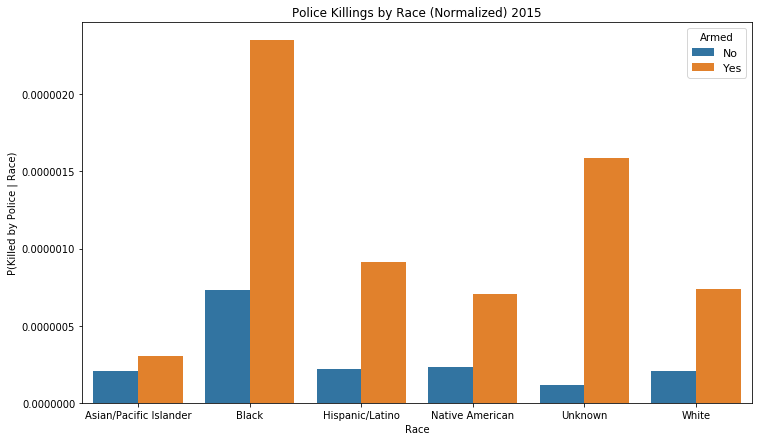

In [6]:
f, ax = plt.subplots(figsize = (12, 7))
sns.set_context('notebook')
sns.barplot(data = race_counts, x = 'Race', y = 'Normalized', hue = 'Armed')
plt.title('Police Killings by Race (Normalized) 2015')
plt.ylabel('P(Killed by Police | Race)')
plt.savefig('Police Killings by Race.png')
plt.show()

In [7]:
plt.close('all')

In [8]:
#Perform a chisquare test
percentages = [.06, .134, .181, .013, .027, .766]
race_percentages = df.groupby('raceethnicity').name.count().reset_index()
race_percentages.columns = ['Race', 'Counts']
total_count= float(len(df))
race_percentages['expected'] = [total_count*percent for percent in percentages]
print(race_percentages)
print(total_count)

                     Race  Counts  expected
0  Asian/Pacific Islander      10    28.020
1                   Black     135    62.578
2         Hispanic/Latino      67    84.527
3         Native American       4     6.071
4                 Unknown      15    12.609
5                   White     236   357.722
467.0


In [9]:
y = chisquare(race_percentages['Counts'], f_exp = race_percentages['expected'])
print(y)

Power_divergenceResult(statistic=141.6159071891565, pvalue=8.112422192920854e-29)


In [10]:
#seperating black and white
only_bw = race_percentages[(race_percentages.Race == 'Black') | (race_percentages.Race == 'White')]
print(only_bw)

    Race  Counts  expected
1  Black     135    62.578
5  White     236   357.722


In [11]:
z = chisquare(only_bw['Counts'], f_exp = only_bw['expected'])
print(z)

Power_divergenceResult(statistic=125.23285964494897, pvalue=4.525949623912207e-29)
